# Training Machine Learning Intro Fall Detection Perceptron

# Table of Contents

- [Overview](#overview)
- [Setting Up a Virtual Environment and Jupyter Notebook in VS Code](#setting-up-a-virtual-environment-and-jupyter-notebook-in-vs-code)
- [What is an AI?](#what-is-an-ai)
- [Machine Learning Workflow Overview](#machine-learning-workflow-overview)
- [Overview of Machine Learning Types](#overview-of-machine-learning-types)
- [Predictive Model Workflow Overview](#predictive-model-workflow-overview)
- [Project Description](#project-description)
- [Perceptron Learning Process Overview](#perceptron-learning-process-overview)
- [Diagram that illustrates the general concept of the perceptron](#diagram-that-illustrates-the-general-concept-of-the-perceptron)
- [Install Required Packages](#install-required-packages)
- [Clean and Normalize The Data](#clean-and-normalize-the-data)
- [Machine Learning Dataset Preparation Workflow](#machine-learning-dataset-preparation-workflow)
- [Our Dataset](#our-dataset)
- [Let's View the Data and Assign Column Names](#lets-view-the-data-and-assign-column-names)
- [Combine All CSV Files into One CSV File and Save with a Version Number](#combine-all-csv-files-into-one-csv-file-and-save-with-a-version-number)
- [This Shows Our Stop Words](#this-shows-our-stop-words)
- [Real Quick We Check the Data That Was Created](#real-quick-we-check-the-data-that-was-created)
- [Main Script](#main-script)
- [Hosting the AI](#hosting-the-ai)
- [Docker Commands](#docker-commands)
- [Send Data to the API and Return isFall Prediction from the Model](#send-data-to-the-api-and-return-isfall-prediction-from-the-model)


### Overview

## Setting Up a Virtual Environment and Jupyter Notebook in VS Code

### Open VS Code and project

### Step 1: Create a Virtual Environment
python3 -m venv myenv
else try 
python -m venv myenv

### Step 2: Activate the Virtual Environment
On Windows:
- myenv\Scripts\activate

On macOS/Linux:
- source myenv/bin/activate

### Step 3: Install Jupyter in the Virtual Environment
- pip install jupyter

### Step 4: Install the ipykernel Package
- pip install ipykernel
- python -m ipykernel install --user --name=myenv --display-name "MyEnv"

### Step 5: Install VS Code Extensions
- Install the Python and Jupyter extensions if you haven't already.
- Open your Jupyter Notebook file (.ipynb) in VS Code.

### Step 6: Select the Virtual Environment in Jupyter Notebook
- Once the notebook is open:
- Click on the kernel selector (in the top right corner of the notebook).
- Select another kernal and look for MyEnv
- Choose your virtual environment (MyEnv in this case).

Now, your notebook will run inside the virtual environment.

@copilot chat:  get image class from ipython


In [151]:

from IPython.display import Image # This class is used to display images in Jupyter Notebooks.
#from keyword import specific classes, functions, and variables from a module # like a using statement c#
# IPython.display is the library, Image is the class

## What is an AI?


- **AI** is the umbrella term for machines that act intelligently.
  - Carry out tasks that typically require human intelligence.
  - Includes understanding speech, recognizing images, making decisions, etc.
- **ML** (Machine Learning) is a method in AI where machines learn from data to improve performance.
  - Supervised learning: Detecting a fall from an incident note.
  - Unsupervised learning: Recommending Netflix shows based on history.
- **DL** (Deep Learning) is a more advanced type of ML using neural networks.
  - Think of it as layers of algorithms processing complex data like images.
  - Example applications:
    - Emotion detection from photos
    - Self-driving cars
    - Voice assistance

copilot chat - @workspace create image object with width 500 and use file #file:overviewai.png

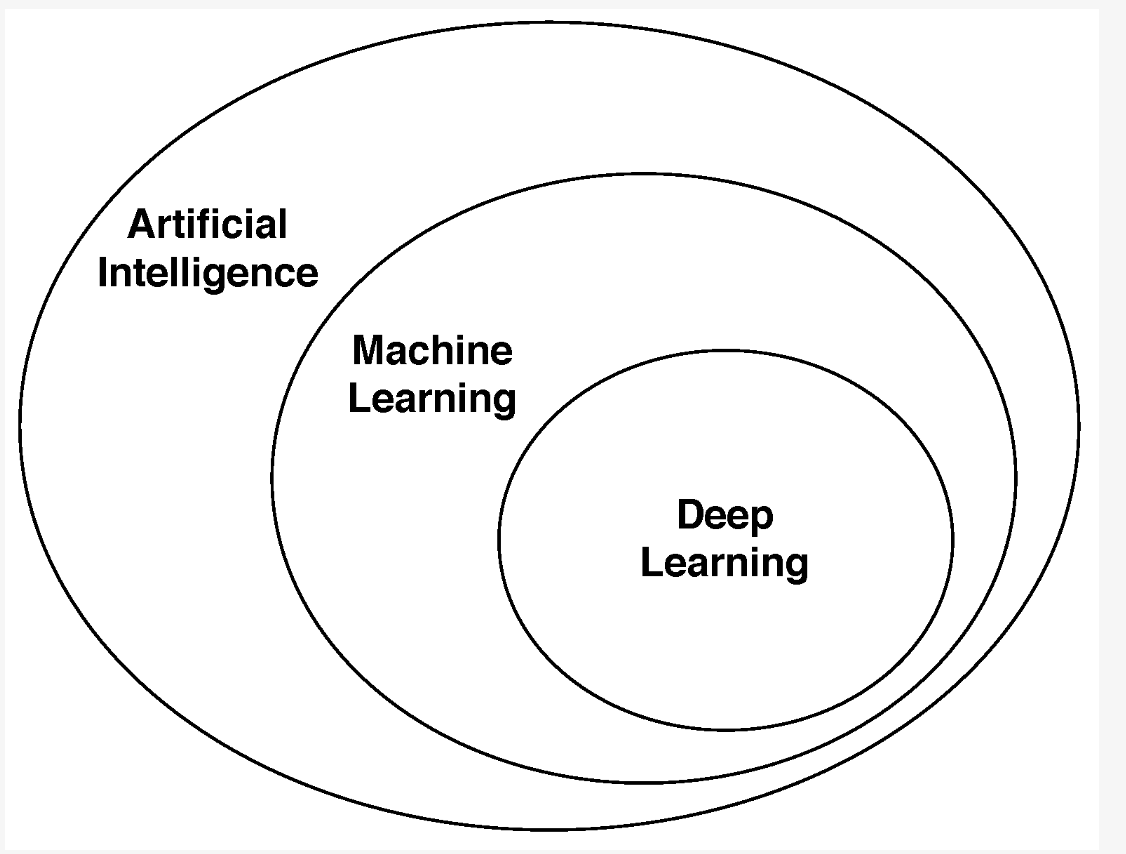

In [152]:
Image(filename='./images/overviewai.png', width=500) # run to display image

### Machine Learning Workflow Overview

1. **Model Architecture**: The process begins by selecting or designing the architecture of the model.
2. **Training Data**: This data is used to train the model and adjust its parameters.
3. **Validation Data**: This data is used during training to fine-tune the model and avoid overfitting.
4. **Model Training**: The model learns from the training data to improve performance.
5. **Test Data**: Once training is complete, the model is evaluated on test data, which it has not seen before.
6. **Evaluation**: The model's performance is measured based on the test data.
7. **Best Model**: The final model, after evaluation, is selected based on its performance metrics.

The process is iterative, as insights from evaluation may lead to revising the model architecture or retraining.


copilot chat - @workspace create image object with width 500 and use file #file:ML_model_development_life_cycle.jpg

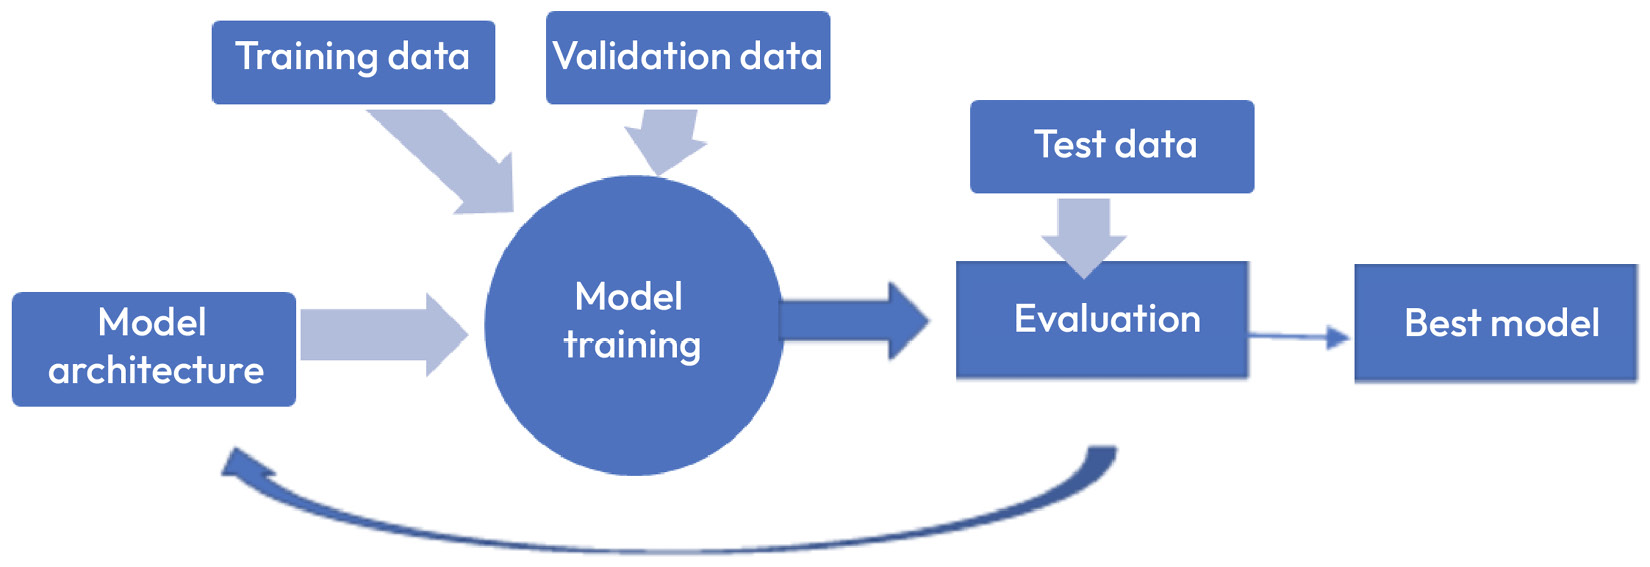

In [153]:
Image(filename='images/ML_model_development_life_cycle.jpg', width=500)

### Overview of Machine Learning Types

1. **Supervised Learning**:
   - Involves labeled data, meaning the input data comes with known output labels.
   - Direct feedback is provided to the model to improve its performance.
   - Commonly used to predict outcomes or future events.

2. **Unsupervised Learning**:
   - Uses data without labels or targets.
   - No direct feedback is given to the model.
   - The goal is to find hidden patterns or structures within the data, such as clustering.

3. **Reinforcement Learning**:
   - Focuses on decision-making processes.
   - Utilizes a reward system where the model learns through rewards or penalties.
   - The aim is to learn a series of actions to maximize cumulative rewards over time.


@copilot chat: @workspace get image object for #file:The_three_different_types_of_machine_learning.png

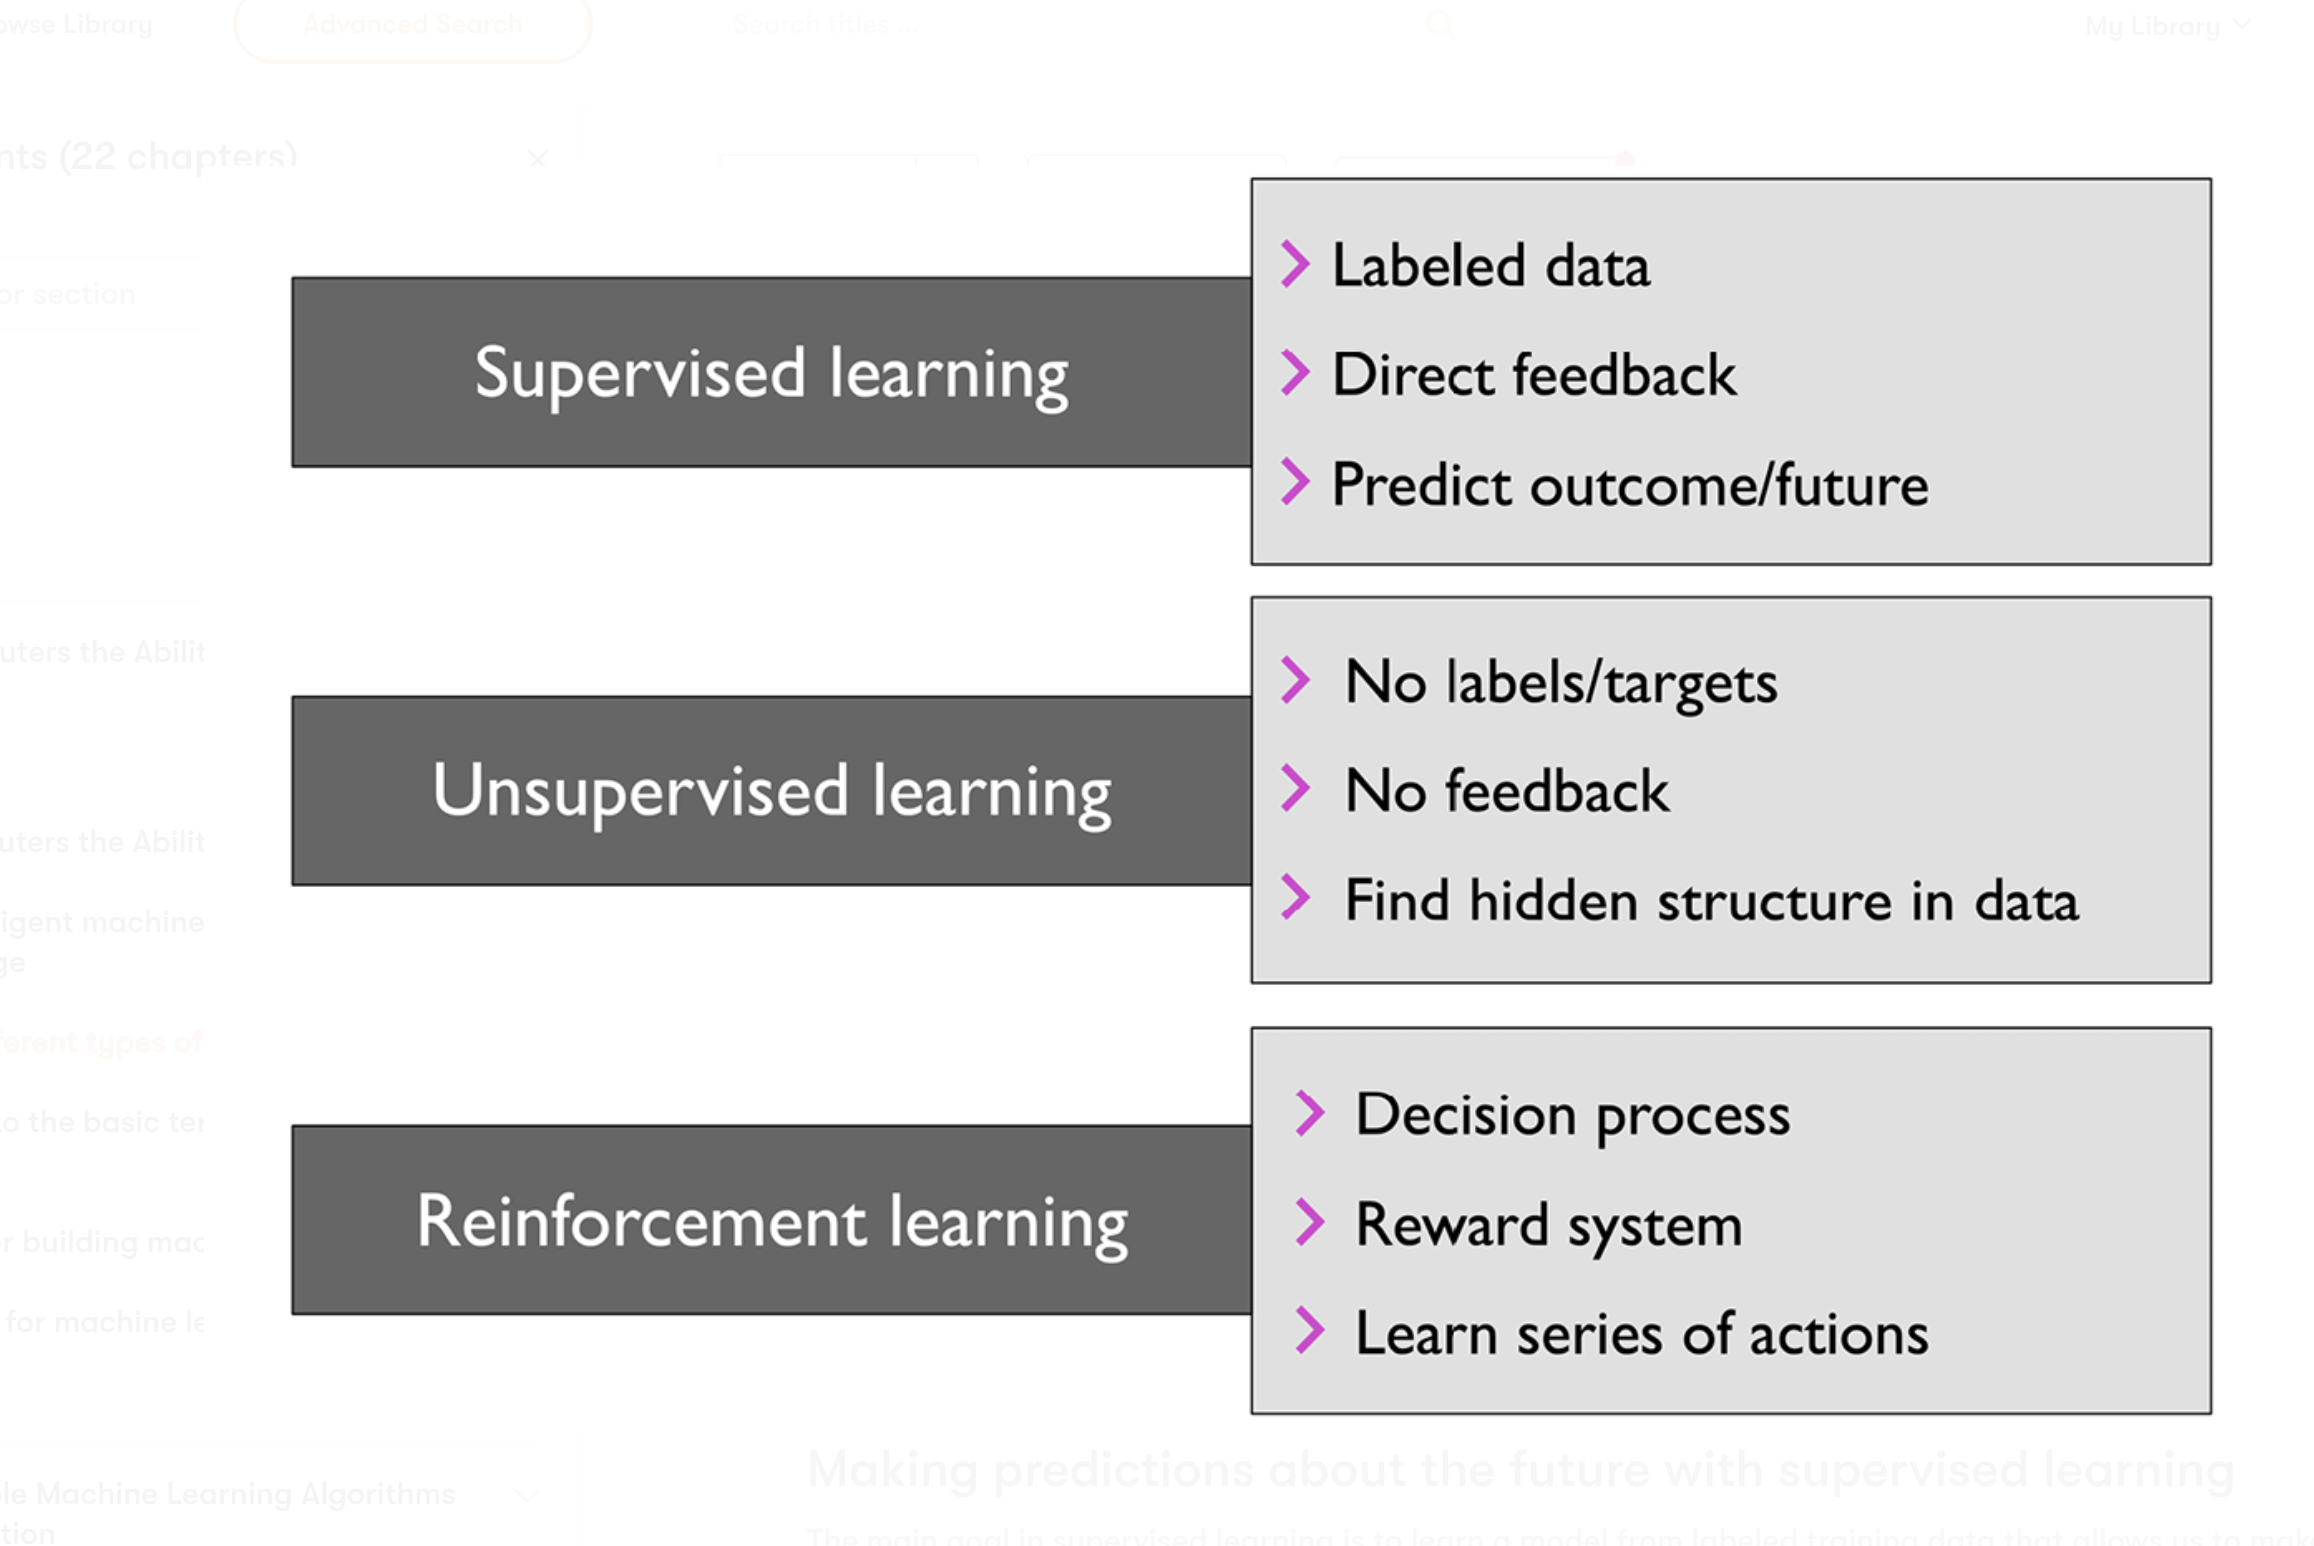

In [154]:
Image(filename='images/The_three_different_types_of_machine_learning.png', width=500)

### Predictive Model Workflow Overview

1. **Raw Data Collection**: 
   - The process begins with gathering raw data, which is then transformed into a structured dataset.

2. **Preprocessing Pipeline**:
   - **Handling Missing Data**: Address missing values by either removing them or imputing them.
   - **Feature Extraction and Selection**: Extract important features from the data and select the most relevant ones.
   - **Dimensionality Reduction**: Use techniques like feature selection or extraction to reduce the number of input variables.

3. **Training and Test Datasets**: 
   - Split the dataset into two parts: training (to build the model) and testing (to evaluate performance).

4. **Model Training**:
   - Feed the preprocessed training dataset into a machine learning algorithm. 
   - In our case:
     ```python
     perceptron_model = Perceptron(max_iter=1000, random_state=42)
     perceptron_model.fit(X_train_cleaned, y_train_cleaned)
     ```
   - **Hyperparameter Tuning**: Select the best hyperparameters (e.g., `max_iter`) to improve performance.

5. **Evaluation**: 
   - The model is tested on the held-out test dataset to assess its performance. This step includes preprocessing of the test data and evaluating the model based on accuracy, precision, recall, and other metrics.

6. **We Pick a Predictive Model**: 
   - The best-performing model from the candidate pool is chosen based on evaluation metrics.

7. **Application**: 
   - The final model is deployed to make predictions on new, unseen data, following similar preprocessing steps.

---

This workflow is iterative—based on the evaluation, you may need to go back and tweak the preprocessing, model, or hyperparameters to improve performance.

@copilot chat: @workspace get image object for #file:PredictiveModelWorkflow.png

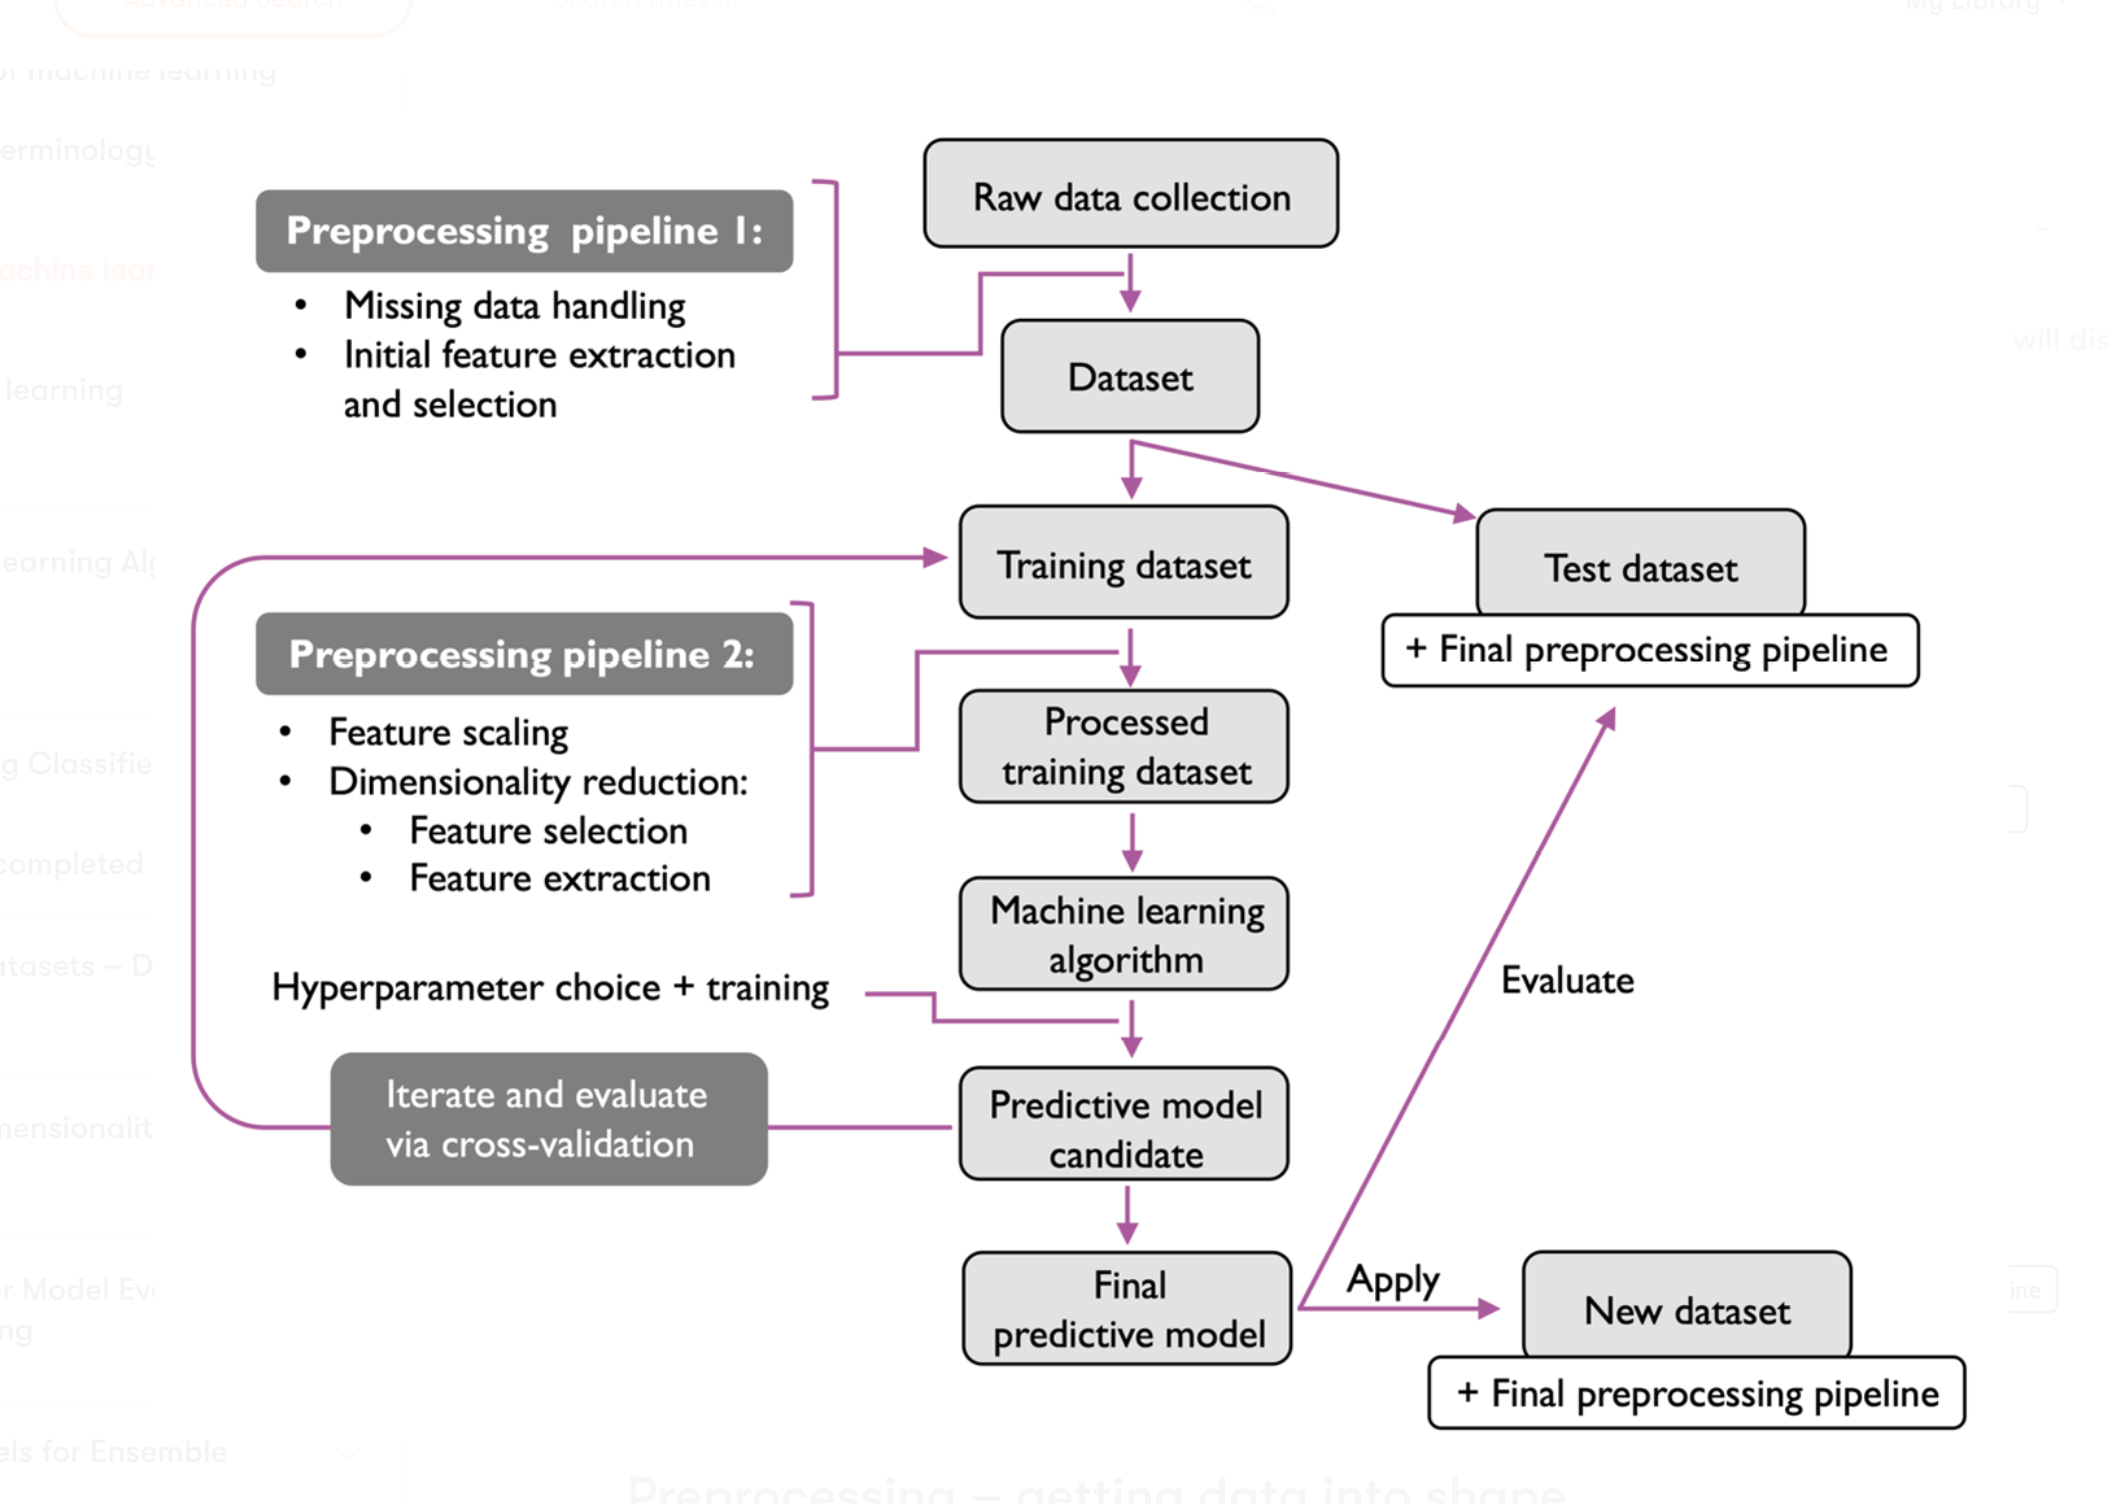

In [155]:
Image(filename='images/PredictiveModelWorkflow.png', width=500)

## Project Description
### Fall Detection Binary Classification

gpt 4-0 https://chatgpt.com/c/66fdce74-3210-8000-8381-f3eb9ab6cbe1

Binary Classification Model using a Perceptron and Perceptron Learning Rule
In this project, we are building a binary classification model that predicts whether an incident description describes a fall or not (i.e., outputting a binary true/false result). The model uses a Perceptron, a type of linear classifier, trained using the Perceptron Learning Rule.

Perceptron Learning Rule:

The Perceptron learning algorithm updates the weights of the model incrementally based on prediction errors. When the model makes an incorrect prediction, the weights are adjusted using the difference between the actual and predicted outputs.
In your code, this is done using:
python
Copy code
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_cleaned, y_train_cleaned)
Model Training:

The Perceptron is trained on a dataset where the input is a vectorized text description of the incident (whether it's a fall or not), and the output is a binary flag (IsFallFlg), where 1 means a fall, and 0 means no fall.
The dataset is split into training and testing sets to evaluate the performance of the model on unseen data.
Fitting:

Fitting the model means running the Perceptron learning algorithm over the training data to minimize the error and update the model's parameters (weights). This fitting process continues for a fixed number of iterations (controlled by max_iter), or until the model converges.
Performance Evaluation:

After training the model, it's evaluated using a confusion matrix to understand how well it predicts fall and no-fall events. Key metrics like precision, recall, and F1 score are used to measure the model's accuracy.
Saving the Model:

Once the model is trained, both the Perceptron model and the TF-IDF vectorizer (used for converting the text descriptions into numerical form) are saved using joblib.dump().

### Perceptron Learning Process Overview

1. **Input Features (x1, x2, ..., xm)**: These are the input data points, each associated with a weight (w1, w2, ..., wm) and a bias (b).

2. **Net Input Function**: The perceptron computes the weighted sum of the input features and bias.

3. **Threshold Function**: The net input is passed through a threshold function, which determines the output. If the weighted sum is above a certain threshold, it outputs 1 (positive class); otherwise, it outputs 0 (negative class).

4. **Prediction (ŷ)**: This output (ŷ) is the predicted class label, which could be 0 or 1.

5. **Error Calculation**: The difference between the predicted class label (ŷ) and the true class label (y) is calculated as the error.

6. **Update**: The weights and bias are adjusted based on the error to improve future predictions. This process is repeated until the model performs well.

This cycle represents a basic neural network learning model, particularly focusing on updating weights during the learning process.


#### Diagram that illustrates the general concept of the perceptron:

copilot chat - @workspace create image object with width 500 and use file #file:perceptron_concept.png

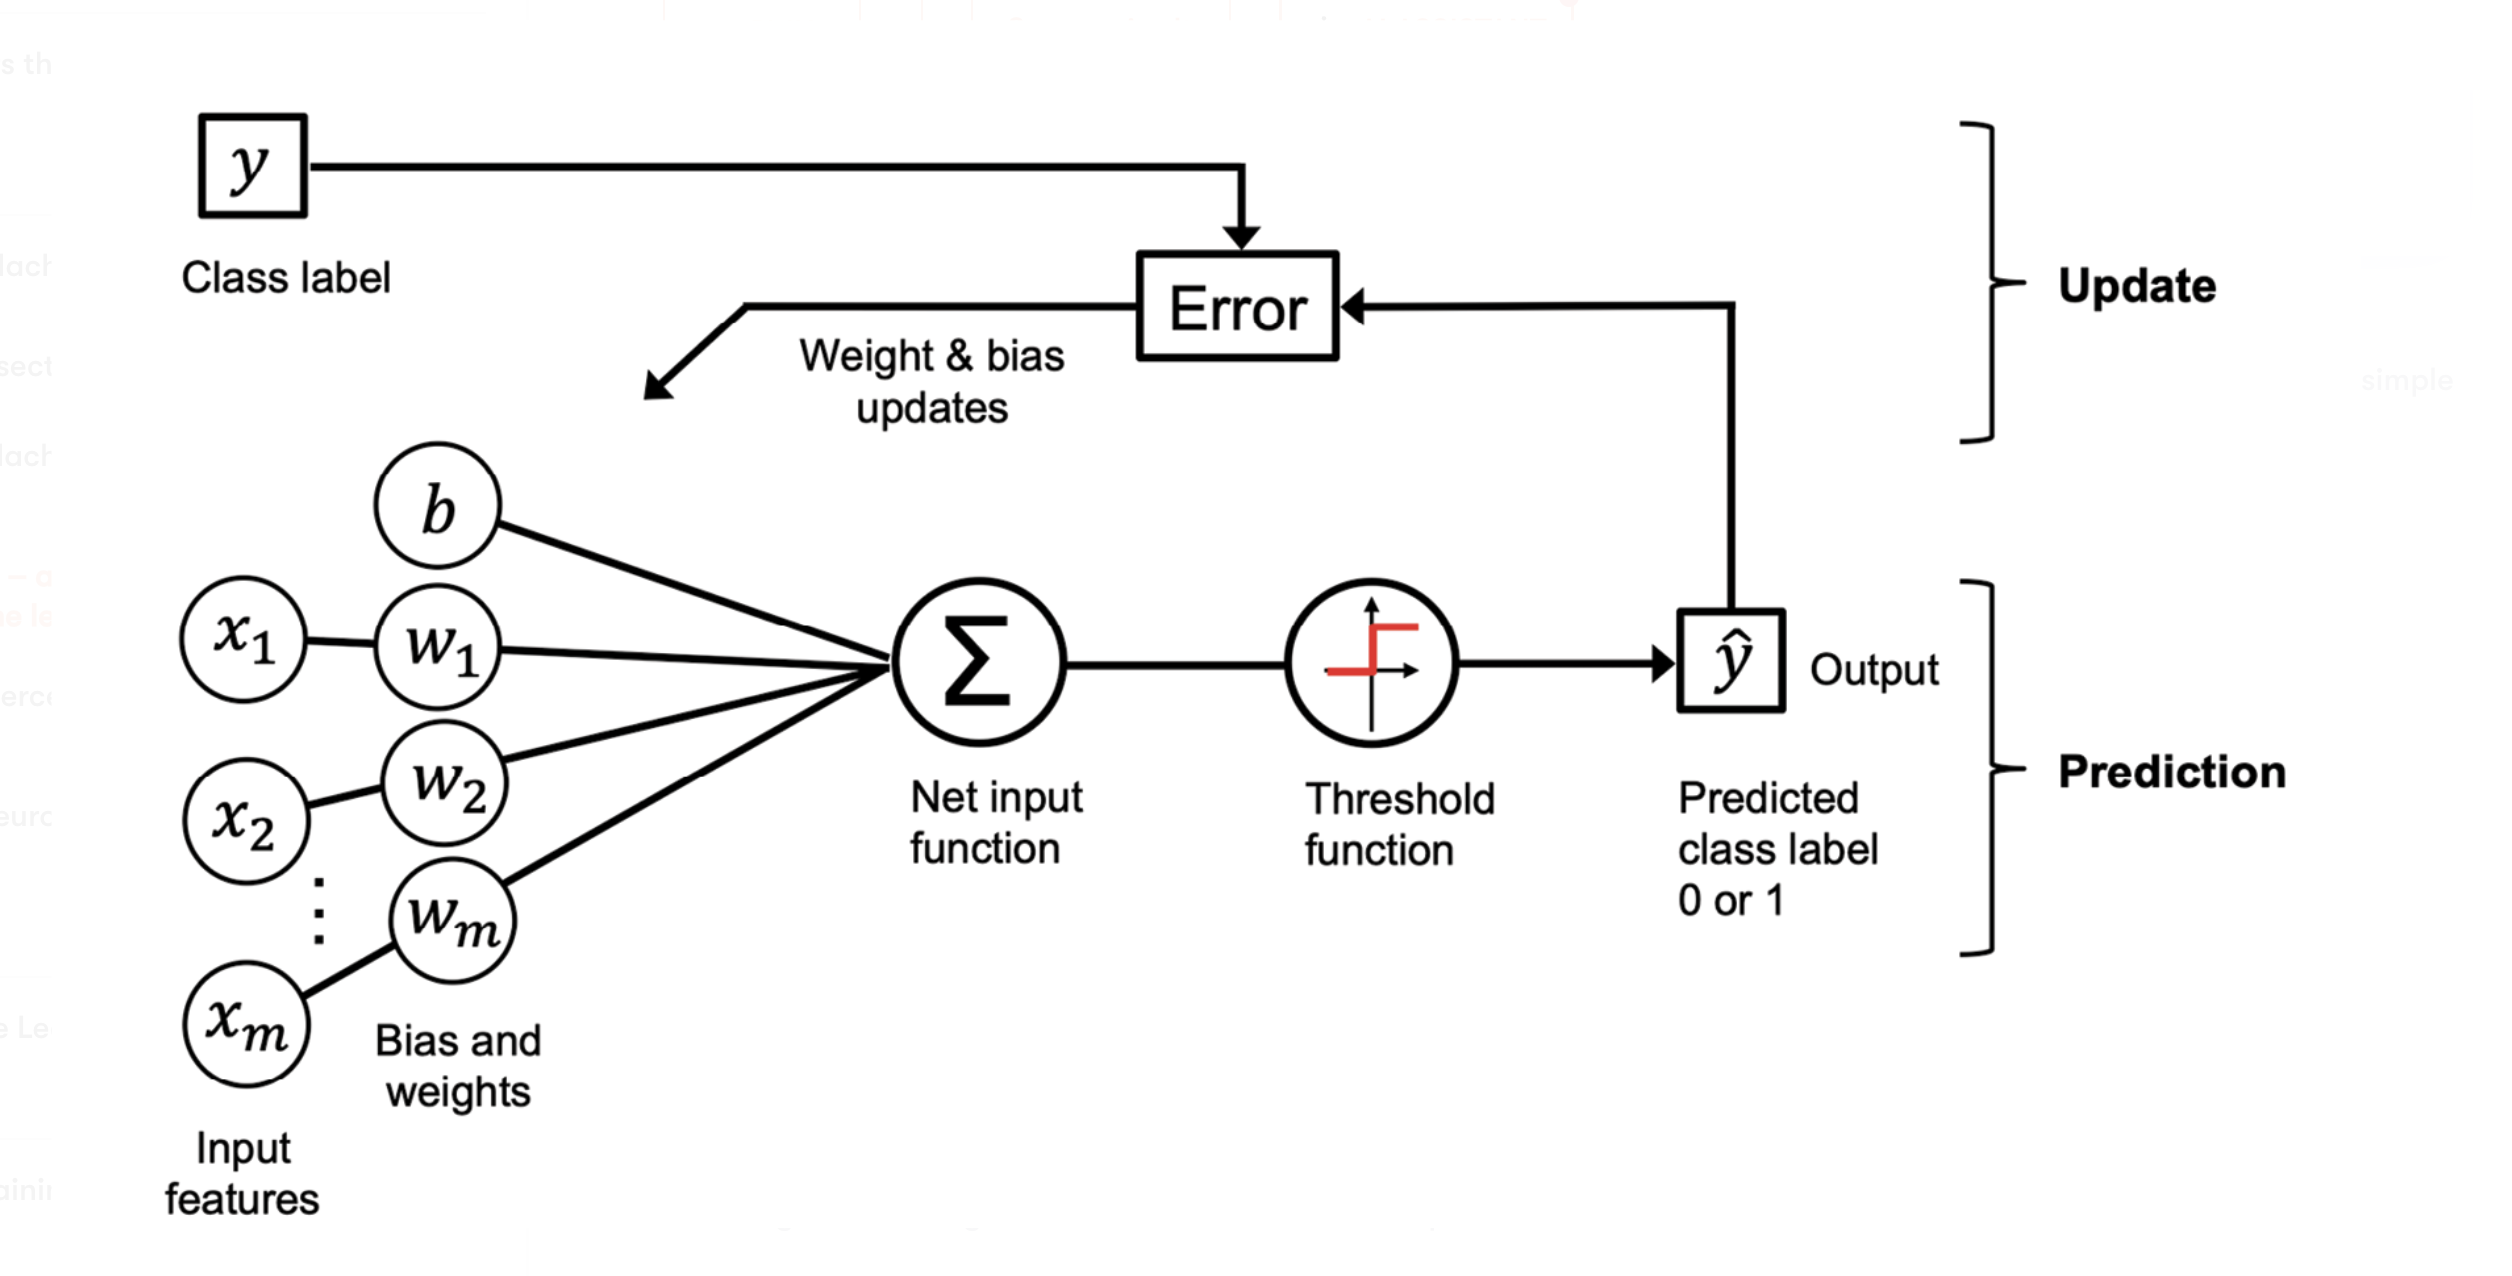

In [156]:
Image(filename='images/perceptron_concept.png', width=500)

### Install requried packages

@copilot chat: !pip3 install jupyter, panads, scikit-learn, matplotlib, seaborn, numpy

In [157]:
!pip3 install jupyter # this is for jupyet notebook
!pip3 install pandas # this is for data manipulation
!pip3 install scikit-learn # this is for machine learning
!pip3 install matplotlib # this is for data visualization
!pip3 install seaborn # this is for data visualization
!pip3 install numpy # this is for numerical computing
!pip3 install nltk

180068.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180075.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180082.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180088.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180094.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180100.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


180106.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


### Clean and Normalize The Data

#### Normalizing Text
- Converting text to lowercase: Ensures that "Fall" and "fall" are treated as the same word.
- Removing special characters or numbers (optional): Depending on the data, you might want to remove punctuation, numbers, or other irrelevant characters.
- Removing stopwords (optional): You might also want to remove common stopwords (like "and," "the," etc.) to reduce noise in the dataset.

We need to get our raw data together into one dataset

### Machine Learning Dataset Preparation Workflow

### Obtain data first, use that legal loop hole if starting with PI data

#### 1. Combine Raw CSV Files
   - If you have multiple CSV files, merge them into a single dataset.
   - You can concatenate data frames if they share similar structures, or join/merge them if you have relational data.
   - Ensure that all data is aligned properly after the merge.

#### 2. Handle Missing Data (NaN values)
   - **Remove Rows**: If the missing data is significant or affects critical columns, remove the rows containing `NaN` values. Be cautious not to remove too much data, as it could impact the quality of your model.
   - **Impute Missing Values**: Alternatively, you can fill missing values with strategies such as:
     - Mean, median, or mode values (for numerical data).
     - Forward or backward fill (for time-series data).
     - Using more advanced imputation methods like KNN imputation.

#### 3. Add Label Columns
   - If your dataset doesn’t already have label columns (i.e., the target you’re predicting), add this column.
   - Ensure the labels are correctly assigned to the corresponding rows.

#### 4. Data Cleaning
   - **Remove Duplicates**: Check for and remove any duplicate rows to avoid data redundancy.
   - **Handle Outliers**: Depending on your dataset, you may want to deal with outliers that could skew your model’s predictions.
   - **Categorical Encoding**: If your dataset contains categorical variables (e.g., 'color', 'country'), encode these as numeric values using techniques like one-hot encoding or label encoding.

#### 5. Normalization/Scaling
   - Normalize or scale the data to ensure all features contribute equally to the model, especially for algorithms sensitive to the magnitude of input features (e.g., neural networks, K-nearest neighbors).
   - **Standardization**: Scale data to have a mean of 0 and a standard deviation of 1.
   - **Min-Max Scaling**: Scale data to a fixed range, typically [0, 1].

---

Once these steps are complete, your dataset will be ready for machine learning model training.


### Our dataset

- Data Source
    - Aline Care
    - Atria, Pegasus, new persepectigve, elegance, aline data
    - tblResidentIncident table in ResidentIncident schema, i looked for binary column, true/false, column and a column with descriptive texts that repeats, like fall, fell, stumble, tripped, floor, injury
    - two columns unlabled data, one almost a continuous set of features/variables and one true/false binary column  with a finite value (fact check all of this Tim)  

- Why i picked? A descriptive column with repeat pattern words and a binary selection column to go along with the description column.


### lets view the data and assign column names
-  train the model on the most meaningful information so it can efficiently distinguish between "fall" and "not fall" scenarios.
- what we need to look for in the data
- show the shape of the data, cause we talk tuples and dimensions by arrays
- the types of the data dtypes
- low memory set to true and load in one chunck save on memory
- skip rows to skip column name when doing the training
- uniqueness, enough info to populate a flag
- give column names cause were working with unlabled data
- we are going to give each column a column type pandas will do this implicimtly but werre going to help it
- were going to view the number of rows that are missing data and remove those, NAN
- were going to take out stop words common words, the, it, all
- were going to use corpus to find the most commonly used words
- were going to take out numbers
- were going to take out puncuations
- we want to be left with words in a description that provide the most meaning to train the classification model to output a true or false isfall or not fall flg

### Combine all our csv files into one csv file and save it with a version number

@copilot chat: open zip file #file:RawData.zip and loop through and append each csv file output data into new csv file combine_data and append version number and use pandas library

@copilot chat: we need to add two columns to this dataset, one incidentDecription of type string, isFallFlg of type int at index position 0, 

-- our combined data frame is shape of 4 and we want a shpae of 2, so something is incorrect in our merge of all the csv files


In [158]:
import pandas as pd
import zipfile
import os
import numpy as np
import shutil
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Step 1: Define the path to the zip file and the output file
zip_file_path = './data/RawData.zip'
output_file_path = './data/combined_data_v1.csv'

# Step 2: Create a temporary directory to extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('temp_extracted_files')

# Step 3: Get all CSV file paths from the extracted files
csv_files = [os.path.join('temp_extracted_files', file) for file in os.listdir('temp_extracted_files') if file.endswith('.csv')]

selected_files = csv_files[0:]

# Print the selected file name and shape
for file in selected_files:
    print(f"Selected file: {file}")

df = pd.read_csv(selected_files[0],
                        names=['IncidentDescription', 'IsFallFlg'],
                        dtype={'IncidentDescription': 'string', 'IsFallFlg': 'int'},
                        index_col=False,
                        low_memory=True) # we want to define our column names



#print(df.head())
# print total number of rows with isfallflg = 0
print("total number of rows with isfallflg = 0", df[df['IsFallFlg'] == 0].shape[0])
# print total number of ros with isfallflg = 1
print("total number of rows with isfallflg = 1", df[df['IsFallFlg'] == 1].shape[0])

# lets print the shape of the dataframe
print("before changes", df.shape)

#print(df.dtypes) # we can view the datatypes to confirm

#lets get a total number of NaN values
#print("total number of NaN values \n", df.isnull().sum())

#lets get rid of the NAN value rows
df = df.dropna()

# use regex to remove all non-alphabetic characters in the incident description column
df['IncidentDescription'] = df['IncidentDescription'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# lets lowercase all teh rows in the incident description column
df['IncidentDescription'] = df['IncidentDescription'].str.lower()

# lets remove stop words like test from the incident description column using corpus
stop_words = stopwords.words('english')
custom_stopwords = ['test', 'tests', 'testing', 'tester', 'tested', 'retest', 'retesting', 'pretest', 'pretesting', 'bgg', 'entry', 'elopement', 'server', 'setup']
stop_words.extend(custom_stopwords)
df['IncidentDescription'] = df['IncidentDescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# remove punctuation  in the incident description column
df['IncidentDescription'] = df['IncidentDescription'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# remove rows with blank incident description
df = df[df['IncidentDescription'] != '']

# check the rows in the incident description column and if they include the word not then change the IsFallFlg to 0
df.loc[df['IncidentDescription'].str.contains('not'), 'IsFallFlg'] = 0
# print the total of not in the incident description column
print("total of not in the incident description column", df[df['IncidentDescription'].str.contains('not')].shape[0])

print("shape after normialization", df.shape)
#print(df.head())
# print total number of rows with isfallflg = 0
print("total number of rows with isfallflg = 0", df[df['IsFallFlg'] == 0].shape[0])
# print total number of ros with isfallflg = 1
print("total number of rows with isfallflg = 1", df[df['IsFallFlg'] == 1].shape[0])

# show me the most common words in the incident description column
from collections import Counter
words = df['IncidentDescription'].str.split(expand=True).stack()
word_freq = words.value_counts()
print("Word frequency\n")
print(word_freq)

# lets save the cleaned data to a new csv file
df.to_csv(output_file_path, index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/squeebit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Selected file: temp_extracted_files/atria_raw_incident_fall_tblincident_v1.csv
Selected file: temp_extracted_files/aline_raw_incident_fall_tblincident_v1.csv
Selected file: temp_extracted_files/newperspective_raw_incident_fall_tblincident_v1.csv
Selected file: temp_extracted_files/pegasus_raw_incident_fall_tblincident_v1.csv
Selected file: temp_extracted_files/elegance_raw_incident_fall_tblincident_v1.csv
total number of rows with isfallflg = 0 88158
total number of rows with isfallflg = 1 118960
before changes (207118, 2)
total of not in the incident description column 121941
shape after normialization (205803, 2)
total number of rows with isfallflg = 0 160183
total number of rows with isfallflg = 1 45620
Word frequency

resident                 576052
notified                 111135
floor                    107482
called                    94194
pain                      77136
                          ...  
ambulatingtransferred         1
couche                        1
coucheno    

### This shows our stop words

In [159]:
from nltk.corpus import stopwords

# Load stop words from NLTK
stop = stopwords.words('english')

# Check if 'test' is a stop word
is_test_stopword = 'test' in stop

print(f"Is 'test' a stop word? {is_test_stopword}")
from nltk.corpus import stopwords

# Load the English stop words list from NLTK
stop_words = stopwords.words('english')

# Print the list of stop words
print(stop_words)



Is 'test' a stop word? False
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', '

@copilot chat: lets open #file:combined_data_v1.csv and print the head using 7 columns

@copilot chat: get column names from df

In [160]:
# real quick we check the data that was created
import pandas as pd

# Read the CSV file
df = pd.read_csv(output_file_path)
#print(df.head(7)) # print 7 rows

column_names = df.columns
print("Column Names:", column_names)


Column Names: Index(['IncidentDescription', 'IsFallFlg'], dtype='object')


## Main Script

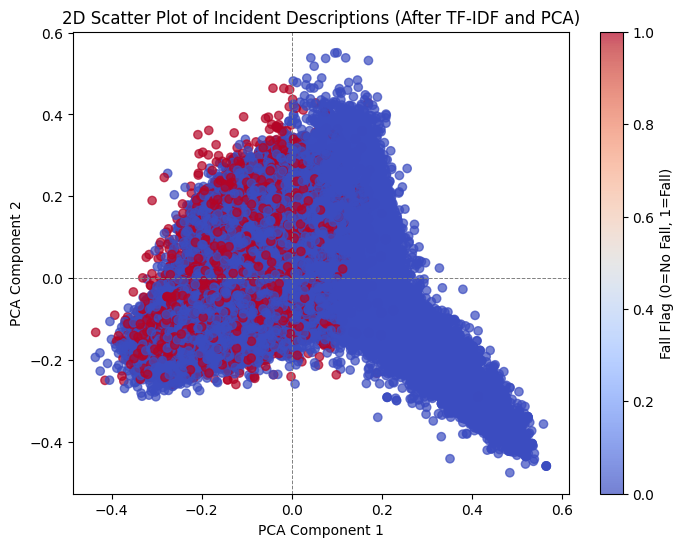

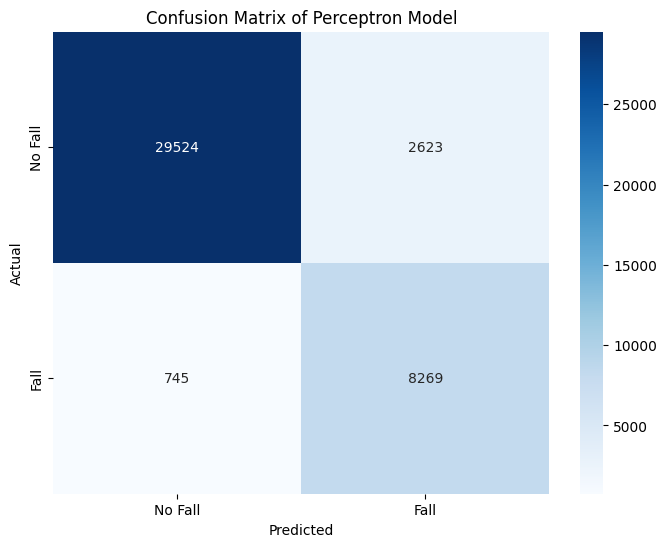

Precision for 'Fall': 0.759
Recall for 'Fall': 0.917
F1 Score: 0.831
Description: 'Resident lost balance but did not fall'
Expected: No Fall (0)
Predicted: Fall (1)
Contains fall-related keywords: True
--------------------------------------------------------------------------------
Description: 'Employee tripped over a cable but caught themselves'
Expected: No Fall (0)
Predicted: Fall (1)
Contains fall-related keywords: True
--------------------------------------------------------------------------------
Description: 'Person stumbled while walking but remained standing'
Expected: No Fall (0)
Predicted: No Fall (0)
Contains fall-related keywords: True
--------------------------------------------------------------------------------
Description: 'No incidents occurred during the shift'
Expected: No Fall (0)
Predicted: No Fall (0)
Contains fall-related keywords: False
--------------------------------------------------------------------------------
Description: 'Resident was unsteady on the

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib
import os


# Load the dataset
#fall_data = pd.read_csv("data/fall_data_v1.csv") this is the old dataset for the original model training
fall_data = pd.read_csv("data/combined_data_v1.csv")

# Extract features and target from the cleaned dataset
X_cleaned = fall_data['IncidentDescription']
y_cleaned = fall_data['IsFallFlg']


# Use bigrams in TF-IDF vectorizer
#vectorizer = TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1, 2))  # For bigrams
# You can also use trigrams if necessary:
#vectorizer = TfidfVectorizer(stop_words='english', max_features=500, ngram_range=(1, 3))  # For trigrams

# # Vectorize the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_vectorized_cleaned = vectorizer.fit_transform(X_cleaned)

#print(vectorizer.vocabulary)
# Print some of the features (bigrams/trigrams) generated by the vectorizer
#print("TF-IDF Features (Bigrams/Trigrams):")
#print(vectorizer.get_feature_names_out()[:50])  # Print the first 50 features

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized_cleaned.toarray())

import matplotlib.pyplot as plt

# 2D scatter plot of the data points after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cleaned, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Fall Flag (0=No Fall, 1=Fall)')

# Add baseline (horizontal and vertical lines at the origin)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Scatter Plot of Incident Descriptions (After TF-IDF and PCA)')
plt.show()

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_vectorized_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train the perceptron model
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train_cleaned, y_train_cleaned) # talk about fitting!!!

# Define the directory path
model_dir = '/model_vec'

# Create the directory if it doesn't exist
model_dir = './model_vec'  # Save in the current working directory
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

#joblib.dump(perceptron_model, os.path.join(model_dir, 'perceptron_model_v1.pkl'))


# Save the model and vectorizer
joblib.dump(perceptron_model, os.path.join(model_dir, 'perceptron_model_v1.pkl'))
joblib.dump(vectorizer, os.path.join(model_dir, 'tfidf_vectorizer.pkl'))

# Make predictions on the test set
y_pred_cleaned = perceptron_model.predict(X_test_cleaned)

# Generate and display the classification report
#report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
#print("Classification Report:\n", report_cleaned)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_cleaned, y_pred_cleaned)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fall', 'Fall'], yticklabels=['No Fall', 'Fall'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Perceptron Model')
plt.show()

# Calculate key metrics (Precision, Recall, F1 Score)
precision = precision_score(y_test_cleaned, y_pred_cleaned)
recall = recall_score(y_test_cleaned, y_pred_cleaned)
f1 = f1_score(y_test_cleaned, y_pred_cleaned)

# Display key metrics
print(f"Precision for 'Fall': {precision:.3f}")
print(f"Recall for 'Fall': {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Test with sample inputs
def predict_fall(description):
    test_input_vectorized = vectorizer.transform([description])
    prediction = perceptron_model.predict(test_input_vectorized)
    return prediction

fall_keywords = ['fall', 'fell', 'collapsed', 'slipped', 'stumbled', 'tripped', 'found lying', 'fainted', 'assisted to the ground']

# List of fall-related keywords (for context)
fall_keywords = ['fall', 'fell', 'collapsed', 'slipped', 'stumbled', 'tripped', 'found lying', 'fainted', 'assisted to the ground']

# List of fall-related keywords (for context)
fall_keywords = ['fall', 'fell', 'collapsed', 'slipped', 'stumbled', 'tripped', 'found lying', 'fainted', 'assisted to the ground']

# Function to compare expected and actual results
def compare_prediction(description, expected):
    prediction = predict_fall(description)
    print(f"Description: '{description}'")
    print(f"Expected: {'Fall (1)' if expected == 1 else 'No Fall (0)'}")
    print(f"Predicted: {'Fall (1)' if prediction == 1 else 'No Fall (0)'}")
    print(f"Contains fall-related keywords: {any(keyword in description.lower() for keyword in fall_keywords)}")
    print('-' * 80)

# No Fall Test Cases
compare_prediction('Resident lost balance but did not fall', 0)
# Expected: No Fall (0), Reason: Although "lost balance" is mentioned, it explicitly says "did not fall".

compare_prediction('Employee tripped over a cable but caught themselves', 0)
# Expected: No Fall (0), Reason: Tripped, but explicitly mentions that the person "caught themselves".

compare_prediction('Person stumbled while walking but remained standing', 0)
# Expected: No Fall (0), Reason: Although "stumbled" is mentioned, "remained standing" negates the fall.

compare_prediction('No incidents occurred during the shift', 0)
# Expected: No Fall (0), Reason: No indication of a fall or fall-like event.

compare_prediction('Resident was unsteady on their feet but did not fall', 0)
# Expected: No Fall (0), Reason: "Unsteady on their feet" implies a potential fall, but it explicitly says "did not fall".

# Fall Test Cases
compare_prediction('Patient slipped and fell in the bathroom', 1)
# Expected: Fall (1), Reason: Clear fall incident with explicit mention of "fell".

compare_prediction('Slip on wet floor led to minor injuries', 1)
# Expected: Fall (1), Reason: Slipping on a wet floor often implies a fall, though it's not directly stated.

compare_prediction('Visitor fainted and collapsed in the hallway', 1)
# Expected: Fall (1), Reason: The word "collapsed" strongly suggests a fall-like incident.

compare_prediction('Patient was found lying on the ground outside', 1)
# Expected: Fall (1), Reason: Being "found lying on the ground" strongly suggests a fall.

compare_prediction('Resident was assisted to the ground due to dizziness', 1)
# Expected: Fall (1), Reason: Being "assisted to the ground" often implies an intentional or semi-controlled fall.


## Hosting the AI

### lets create the api and the docker container to host this model, then postman call

- in terminal touch make sure ur in the parent directory touch app.py

- terminal code app.py

@copilot chat: #editor this is our flask api that run on 0.0.0.0 at port 8080 and we need to load both vectors and model to make predictions we will use the predict route to make predictions

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os

# Load the model and vectorizer
model = joblib.load('/model_vec/perceptron_model_v1.pkl')
vectorizer = joblib.load('/model_vec/tfidf_vectorizer.pkl')  # Ensure you save the vectorizer as well during training

# Initialize the Flask application
app = Flask(__name__)

# Define a route to predict the fall flag
@app.route('/api/predict', methods=['POST'])
def predict():
    # Get the incident description from the request
    description = request.json['description']

    # Vectorize the input
    vectorized_input = vectorizer.transform([description])

    # Make a prediction
    prediction = model.predict(vectorized_input)[0]

    return jsonify({'prediction': int(prediction)})

# Run the Flask application
if __name__ == '__main__':
    port = int(os.environ.get('PORT', 8080))
    app.run(debug=True, host='0.0.0.0', port=port)


## Docker commands
- in terminal make sure ur in the project root directory and type touch Dockerfile 

- then terminal code Dockerfile

@copilot chat: write me the dockerbuild code to call #file:app.py and use python slim 3.12

- docker commands to run:
-- docker ps
-- docker build -t fall-detection-api .
-- docker run -d -p 8080:8080 -e PORT=8080 fall-detection-api
-- docker ps
-- docker stop <container_id_or_name>


In [ ]:
# Dockerfile for app.py Flask application running on 0.0.0.0:8080

# Use the official Python 3.12-slim image from the Docker Hub
FROM python:3.12-slim

# Set the working directory in the container
WORKDIR /app

# Copy the current directory contents into the container at /app
COPY . /app

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Make port 8080 available to the world outside this container
EXPOSE 8080

# Run app.py when the container launches
CMD ["python", "app.py"]

### Send data to the API that and return isFall prediction from the model

## open postman

{
   //"description": "In the morning, the resident fell on the way to the bathroom and hit their head on the kitchen table and not on the "
   //"description": "Resident tripped over a chair and fell to the ground"
   //"description": "Visitor fainted and collapsed in the hallway"
   //"description": "Patient was found in the hallway on the ground. When asking the Patient they mentioned they fell"
   //"description": "No incidents occurred during the shift"
   "description": "The resident drove to the mall"
}


